# EDS6340 - Introduction to Data Science - Project Phase 2

## Group 10
Achanta, Sai Praneeth | 2302324 <br>
Montanez, Derek N | 1920577 <br>
Sai Kiran Anugam | 2312298 <br>
Sandeep Kokkula | 2102358 <br>
Seelam, Gayathri | 2297215 <br>
Venkata Kaushik Belusonti | 2284811

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif


### Review the cleaned dataset from Phase 2

In [4]:
# Read the clean dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/Secondary_Mushroom_Dataset/Group_10_Data_Cleaning.csv")
df = df.drop(['Unnamed: 0'], axis = 1)
# Display the first few tuples of the dataset
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1,2.340396,6,2,6,0,2,10,2.409448,0.675929,11,1,2,0,3
1,1,2.340396,6,2,6,0,2,10,2.409448,0.812813,11,1,2,0,2
2,1,2.053072,6,2,6,0,2,10,2.409448,0.756815,11,1,2,0,3
3,1,2.079925,2,3,1,0,2,10,2.409448,0.537799,11,1,5,0,3
4,1,2.206132,6,3,6,0,2,10,2.409448,0.689617,11,1,5,0,3


In [5]:
# Display the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60923 entries, 0 to 60922
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 60923 non-null  int64  
 1   cap-diameter          60923 non-null  float64
 2   cap-shape             60923 non-null  int64  
 3   cap-surface           60923 non-null  int64  
 4   cap-color             60923 non-null  int64  
 5   does-bruise-or-bleed  60923 non-null  int64  
 6   gill-attachment       60923 non-null  int64  
 7   gill-color            60923 non-null  int64  
 8   stem-height           60923 non-null  float64
 9   stem-width            60923 non-null  float64
 10  stem-color            60923 non-null  int64  
 11  has-ring              60923 non-null  int64  
 12  ring-type             60923 non-null  int64  
 13  habitat               60923 non-null  int64  
 14  season                60923 non-null  int64  
dtypes: float64(3), int6

### **Objective:** Train various machine learning algorithms to ***classify*** the mushrooms in the Secondary Mushroom Dataset. Model classfies the mushrooms into classes, Edible (0) and Poisonous (1).

## Step 1 - Machine Learning Model Training
### Four machine learning modeling techniques are used to get the model from the data. Hyperparameter tuning is also done wherever possible.

#### Split the features into predicted features and target feature

In [6]:
# Split the features to predicted (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

#### Dataset splitted to Train (80%) and Test (20%)

In [7]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define functions to estimate the performance metrics


In [8]:
# Function for perfromance metric of data
def Perf_Metric(Actual_Ouput, Prediction_Output):
  # Actual_Ouput is the actual output of training data taken from the dataset
  # TrainData_Prediction is the predicted output from the model for the training data
  Accuracy = round(accuracy_score(Actual_Ouput, Prediction_Output),3)
  F1Score = round(f1_score(Actual_Ouput, Prediction_Output),3)
  Precision = round(precision_score(Actual_Ouput, Prediction_Output),3)
  Recall = round(recall_score(Actual_Ouput, Prediction_Output),3)
  return [Accuracy, F1Score, Precision, Recall]

# Logistic Regression

## Logistic Regression - Strong regularization strength - C=0.01

In [9]:
# Fit the model from taining data using logistic regression
model = LogisticRegression(max_iter=10_000, C=0.01)
lr = model.fit(X_train, y_train)

# Model fit with training data
y_train_predict = lr.predict(X_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate perfromance metrics
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

LR_Czeropoint01_Train_PM = Train_PM
LR_Czeropoint01_Test_PM = Test_PM

# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['Logistic Regression'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.630,0.688,0.645,0.738
1,Test,0.628,0.689,0.648,0.736


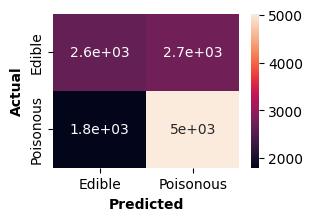

In [10]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

## Logistic Regression - Medium regularization strength - C=0.1

In [11]:
# Fit the model from taining data using logistic regression
model = LogisticRegression(max_iter=10_000, C=0.1)
lr = model.fit(X_train, y_train)

# Model fit with training data
y_train_predict = lr.predict(X_train)
# Make predictions on the test data
y_pred = lr.predict(X_test)

Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

LR_Czeropoint1_Train_PM = Train_PM
LR_Czeropoint1_Test_PM = Test_PM

In [12]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['Logistic Regression'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.631,0.688,0.645,0.738
1,Test,0.628,0.689,0.648,0.736


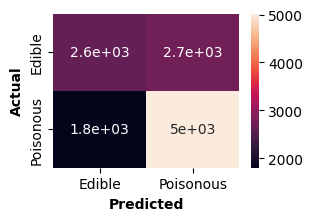

In [13]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

## Logistic Regression - Weak regularization strength - C= 1 (Default)

In [14]:
# Fit the model from taining data using logistic regression
model = LogisticRegression(max_iter=10_000, C=1)
lr = model.fit(X_train, y_train)

# Model fit with training data
y_train_predict = lr.predict(X_train)
# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

LR_C1_Train_PM = Train_PM
LR_C1_Test_PM = Test_PM

In [15]:
# Create a table comparing the performance on training and test data
models = pd.DataFrame({
    #'Model': ['Logistic Regression'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.631,0.689,0.645,0.738
1,Test,0.628,0.689,0.648,0.736


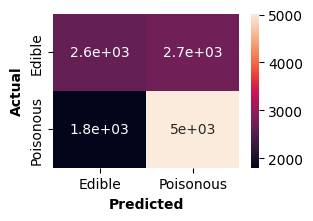

In [16]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

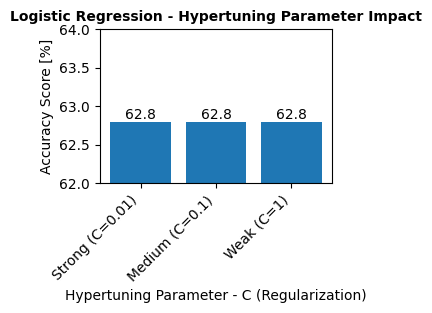

In [17]:
# Impact of hypertuning parameters in logistic regression
hyperpar_names = ["Strong (C=0.01)","Medium (C=0.1)","Weak (C=1)"]
hyperpar_acc = [round(LR_Czeropoint01_Test_PM[0]*100,3), round(LR_Czeropoint1_Test_PM[0]*100,3), round(LR_C1_Test_PM[0]*100,3)]
#aman_uni = pd.DataFrame(review_freq, columns=['Unigram', 'Frequency'])
#aman_uni = aman_uni.set_index('Unigram')

# Plot the bar graph using matplotlib
fig = plt.figure(figsize=(3, 2))
bars = plt.bar(hyperpar_names, hyperpar_acc)
plt.title('Logistic Regression - Hypertuning Parameter Impact', fontsize=10, fontweight='bold')
plt.xlabel('Hypertuning Parameter - C (Regularization)')
plt.ylabel('Accuracy Score [%]')
plt.ylim([62, 64])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.show()


# KNN

## KNN - Nearest Neighbors = 5 (Default)

In [18]:
model = KNeighborsClassifier()
knn = model.fit(X_train, y_train)

# Model fit with training data
y_train_predict = knn.predict(X_train)
# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

KNN_5_Train_PM = Train_PM
KNN_5_Test_PM = Test_PM

In [19]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['KNN'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.998,0.998,0.998,0.998
1,Test,0.996,0.996,0.996,0.996


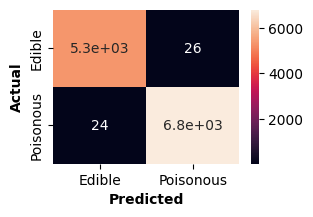

In [20]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

## KNN - Nearest Neighbors = 7

In [21]:
model = KNeighborsClassifier(n_neighbors=7)
knn = model.fit(X_train, y_train)

# Model fit with training data
y_train_predict = knn.predict(X_train)
# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

KNN_7_Train_PM = Train_PM
KNN_7_Test_PM = Test_PM

In [22]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['KNN'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.997,0.997,0.997,0.997
1,Test,0.995,0.995,0.995,0.995


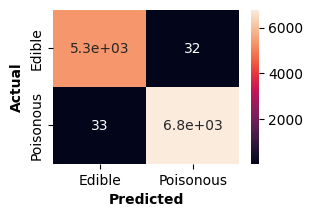

In [23]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

## KNN - Nearest Neighbors = 10

In [24]:
# Fit the model from taining data using KNN
model = KNeighborsClassifier(n_neighbors=10)
knn = model.fit(X_train, y_train)

In [25]:
# Model fit with training data
y_train_predict = knn.predict(X_train)
# Make predictions on the test data
y_pred = knn.predict(X_test)

In [26]:
# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

KNN_10_Train_PM = Train_PM
KNN_10_Test_PM = Test_PM

In [27]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['KNN'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.994,0.995,0.996,0.993
1,Test,0.992,0.993,0.994,0.991


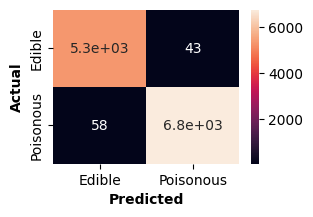

In [28]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

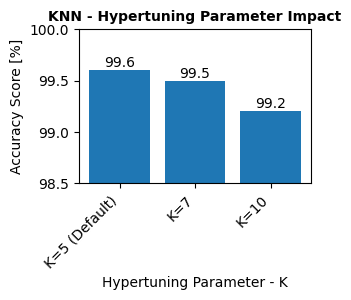

In [29]:
# Impact of hypertuning parameters in KNN
hyperpar_names = ["K=5 (Default)","K=7","K=10"]
hyperpar_acc = [round(KNN_5_Test_PM[0]*100,3), round(KNN_7_Test_PM[0]*100,3), round(KNN_10_Test_PM[0]*100,3)]
#aman_uni = pd.DataFrame(review_freq, columns=['Unigram', 'Frequency'])
#aman_uni = aman_uni.set_index('Unigram')

# Plot the bar graph using matplotlib
fig = plt.figure(figsize=(3, 2))
bars = plt.bar(hyperpar_names, hyperpar_acc)
plt.title('KNN - Hypertuning Parameter Impact', fontsize=10, fontweight='bold')
plt.xlabel('Hypertuning Parameter - K')
plt.ylabel('Accuracy Score [%]')
plt.ylim([98.5, 100])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.show()


# Random Forest

In [30]:
# Fit the model from training data using Random Forest
model = RandomForestClassifier()
rf = model.fit(X_train, y_train)

In [31]:
# Model fit with training data
y_train_predict = rf.predict(X_train)
# Make predictions on the test data
y_pred = rf.predict(X_test)

In [32]:
# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

RF_Train_PM = Train_PM
RF_Test_PM = Test_PM

In [33]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,1.000,1.000,1.000,1.000
1,Test,0.999,0.999,0.999,0.999


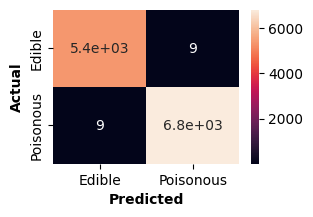

In [34]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

# Support Vector Machine (SVM)

# SVM with Linear Kernel

In [35]:
# Fit the model from training data using SVM linear kernel
model = SVC(kernel='linear')
svm_linear = model.fit(X_train, y_train)

# Model fit with training data
y_train_predict = svm_linear.predict(X_train)
# Make predictions on the test data
y_pred = svm_linear.predict(X_test)

# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

SVM_Linear_Train_PM = Train_PM
SVM_Linear_Test_PM = Test_PM

In [36]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.638,0.696,0.649,0.752
1,Test,0.638,0.699,0.654,0.751


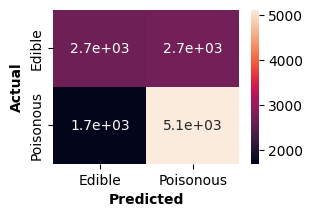

In [37]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

# SVM with Non-linear Kernel

In [38]:
# Fit the model from training data using SVM non-linear kernel
model = SVC(kernel='rbf')
svm_rbf = model.fit(X_train, y_train)

# Model fit with training data
y_train_predict = svm_rbf.predict(X_train)
# Make predictions on the test data
y_pred = svm_rbf.predict(X_test)

# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

SVM_RBF_Train_PM = Train_PM
SVM_RBF_Test_PM = Test_PM

In [39]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,0.869,0.881,0.881,0.881
1,Test,0.863,0.877,0.882,0.872


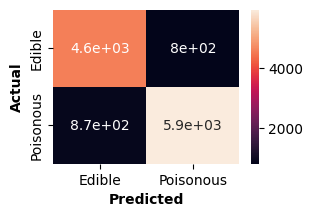

In [40]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

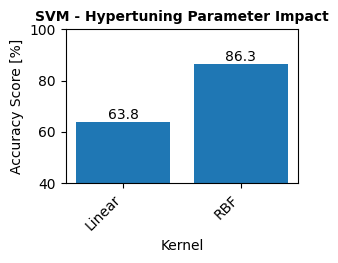

In [41]:
# Impact of hypertuning parameters in SVM
hyperpar_names = ["Linear","RBF"]
hyperpar_acc = [round(SVM_Linear_Test_PM[0]*100,3), round(SVM_RBF_Test_PM[0]*100,3)]
#aman_uni = pd.DataFrame(review_freq, columns=['Unigram', 'Frequency'])
#aman_uni = aman_uni.set_index('Unigram')

# Plot the bar graph using matplotlib
fig = plt.figure(figsize=(3, 2))
bars = plt.bar(hyperpar_names, hyperpar_acc)
plt.title('SVM - Hypertuning Parameter Impact', fontsize=10, fontweight='bold')
plt.xlabel('Kernel')
plt.ylabel('Accuracy Score [%]')
plt.ylim([40, 100])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.show()

# Decision Tree

## Decision Tree - Criterion = Gini

In [42]:
# Decision
model = DecisionTreeClassifier()
dt = model.fit(X_train, y_train)

# Model fit with training data
y_train_predict = dt.predict(X_train)
# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

DT_Gini_Train_PM = Train_PM
DT_Gini_Test_PM = Test_PM


In [43]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,1.000,1.000,1.000,1.000
1,Test,0.994,0.995,0.994,0.995


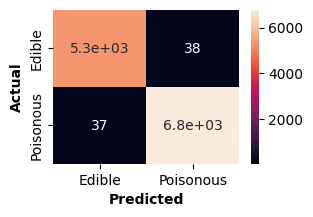

In [44]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

## Decision Tree - Criterion = Entropy

In [45]:
# Decision
model = DecisionTreeClassifier(criterion="entropy")
dt = model.fit(X_train, y_train)

# Model fit with training data
y_train_predict = dt.predict(X_train)
# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

DT_Entropy_Train_PM = Train_PM
DT_Entropy_Test_PM = Test_PM


In [46]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,1.000,1.000,1.000,1.000
1,Test,0.995,0.996,0.995,0.996


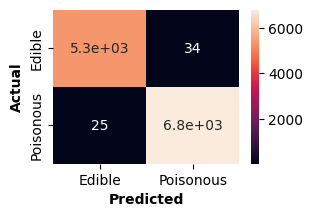

In [47]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

## Decision Tree - Criterion = Log loss

In [48]:
# Decision
model = DecisionTreeClassifier(criterion="log_loss")
dt = model.fit(X_train, y_train)

# Model fit with training data
y_train_predict = dt.predict(X_train)
# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate performance metric for training and testing data
Train_PM = Perf_Metric(y_train,y_train_predict)
Test_PM = Perf_Metric(y_test,y_pred)

DT_Logloss_Train_PM = Train_PM
DT_Logloss_Test_PM = Test_PM


In [49]:
# Create a table comparing the preformance on training and test data
models = pd.DataFrame({
    #'Model': ['RF'],
    'Dataset': ["Train","Test"],
    'Accuracy Score': [Train_PM[0], Test_PM[0]],
    'F1 Score': [Train_PM[1], Test_PM[1]],
    'Precision': [Train_PM[2], Test_PM[2]],
    'Recall': [Train_PM[3], Test_PM[3]],
})
models

,Dataset,Accuracy Score,F1 Score,Precision,Recall
0,Train,1.000,1.000,1.000,1.000
1,Test,0.995,0.996,0.995,0.997


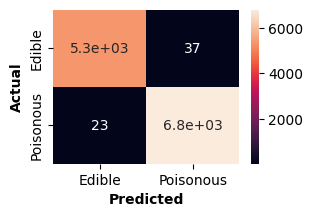

In [50]:
# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(3, 2))
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":10},
           xticklabels=['Edible', 'Poisonous'],
           yticklabels=['Edible', 'Poisonous'],)
plt.xlabel('Predicted',fontweight='bold')
plt.ylabel('Actual',fontweight='bold');

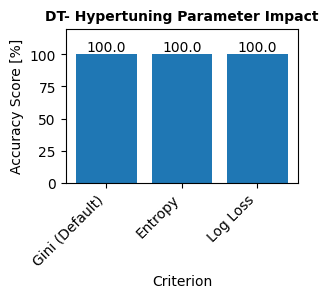

In [51]:
# Impact of hypertuning parameters in DT
hyperpar_names = ["Gini (Default)","Entropy","Log Loss"]
hyperpar_acc = [round(DT_Gini_Train_PM[0]*100,3), round(DT_Entropy_Train_PM[0]*100,3), round(DT_Logloss_Train_PM[0]*100,3)]
#aman_uni = pd.DataFrame(review_freq, columns=['Unigram', 'Frequency'])
#aman_uni = aman_uni.set_index('Unigram')

# Plot the bar graph using matplotlib
fig = plt.figure(figsize=(3, 2))
bars = plt.bar(hyperpar_names, hyperpar_acc)
plt.title('DT- Hypertuning Parameter Impact', fontsize=10, fontweight='bold')
plt.xlabel('Criterion')
plt.ylabel('Accuracy Score [%]')
plt.ylim([0, 120])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.show()

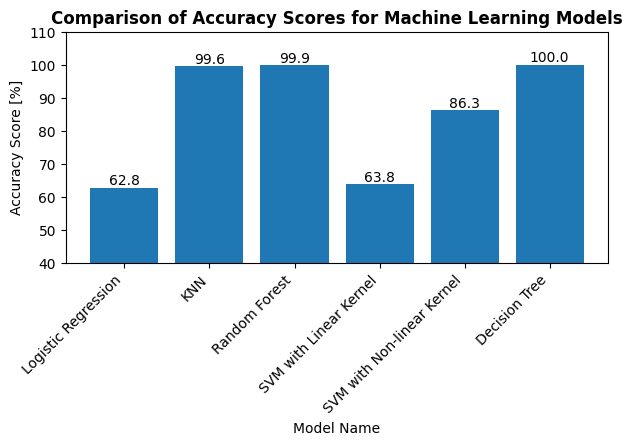

In [52]:
# Impact of hypertuning parameters in logistic regression
mlmodel_names = ["Logistic Regression","KNN","Random Forest","SVM with Linear Kernel","SVM with Non-linear Kernel","Decision Tree"]
mlmodel_acc = [round(LR_C1_Test_PM[0]*100,3), round(KNN_5_Test_PM[0]*100,4), round(RF_Test_PM[0]*100,3), round(SVM_Linear_Test_PM[0]*100,3), round(SVM_RBF_Test_PM[0]*100,3), round(DT_Gini_Train_PM[0]*100,3)]

# Plot the bar graph using matplotlib
fig = plt.figure(figsize=(7, 3))
bars = plt.bar(mlmodel_names, mlmodel_acc)
plt.title('Comparison of Accuracy Scores for Machine Learning Models', fontsize=12, fontweight='bold')
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score [%]')
plt.ylim([40, 110])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')
plt.show()

Observations:
1. Decision Tree, Random Forest, and KNN shos the best accuracy
2. In KNN, with increase in K, the accuracy drops
3. Non-linear SVM shows better accuracy than linear SVM


In [53]:
# Save the train and test data to pickles
X_train.to_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_Xtrain.pkl")
X_test.to_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_Xtest.pkl")
y_train.to_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_ytrain.pkl")
y_test.to_pickle("/content/drive/MyDrive/Colab Notebooks/DS_Project_Group10/ipynb_Files/dummy_ytest.pkl")